# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [2]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 22.39 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  This paper is about a framework for cleaning data called tidying. Tidying involves simplifying uncleaned data into tables with variables x and observations y, creating easy-to-manipulate and consistent observational units.


  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  The tidy data standard is intended to provide a standardized method for cleaning data, simplifying the data cleaning process and facilitating translation between the data and data manipulation tools. This enables the data scientist to spend less time on cleaning and more time on analysis.


  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  First sentence: Tidy datasets have the same characteristics, so tools and functions can operate on different datasets to find meaning in the same way. Messy datasets may have different quirks, so writing functions to operate on messy datasets or cleaning them has to be done differently with each new dataset -- nothing works the same way twice.

  Second sentence: The same idea as the first -- when you can generalize a function to operate on many datasets, you can accomplish a great deal more analysis in the same amount of time. However, this generalization can prove exceptionally challenging when no two datasets are quite alike, and you must examine each dataset to learn its quirks.


  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  Values: the individual items that make up the dataset, variables, and observations, typically quantitative (int) or qualitative (str).

  Variables: organized based on a particular underlying attribute. Contains multiple values, all of which represent a particular unit's corresponding attribute.

  Observations: organized based on individual units being measured. Contains multiple values, all of which when combined make up every attribute for which the individual unit has a value.


  5. How is "Tidy Data" defined in section 2.3?

  Each variable makes a column, each observation makes a row, and each observational unit (such as a study) forms a table. In the ordering, fixed (known beforehand) variables should come before measured variables, with the ordering of the first variable dictating the ordering of the observations and connected variables appearing next to each other.


  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  5 most common problems with messy datasets: (1) column headers are values, not variable names, (2) multiple variables stored in one column, (3) variables stored in both rows and columns, (4) multiple observational units in one table, (5) single observational unit in multiple tables.

  Why Table 4 is messy: The variables are 'religion', 'income', and 'frequency', so it breaks (1).

  "Melting': Turning columns containing values into rows, or "stacking". This process is ordered based on a column that is already a variable, or "colvar".


  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Table 11 is messy because the d1 etc. columns are part of the 'date' variable, which is also stored in two different columns, and the variables tmax and tmin are stored in the same column. The first problem is rectified in Table 12a, and the second is rectified in Table 12b.


  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  Tidy data is only useful if you have tools designed to interact with it; because data and tools are constantly evolving, it is difficult to coordinate tidy data with tidy tools so that the tidy data framework is actually useful. Wickham hopes that at some point, it is possible to create tidy tools for dealing with multidimensional arrays, or even tidy tools that can interpret data in any form and automatically choose between dataframe-tidy and array-tidy formats.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
# Answering Part 1
# Make the dataframe

import pandas as pd
import numpy as np

filename = r'/content/assignment2/data/airbnb_hw.csv'

df = pd.read_csv(filename)
print(df)

        Host Id Host Since                                Name Neighbourhood   \
0       5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1      33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2      39608626        NaN                Sunny Room in Harlem      Manhattan   
3           500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4           500  6/26/2008            Trendy Times Square Loft      Manhattan   
...         ...        ...                                 ...            ...   
30473  43022976  8/31/2015   10 Mins to Time Square/two floors         Queens   
30474  42993382  8/31/2015       1BR ocean view & F,Q train st       Brooklyn   
30475  43033067  8/31/2015                Amazing Private Room       Brooklyn   
30476  43000991  8/31/2015   Charming private female room: UWS      Manhattan   
30477  42999189  8/31/2015    Huge Beautiful Bedroom - Astoria         Queens   

      Property Type  Review

In [4]:
# Kowalski, analysis!

print(df.dtypes, '\n')
df.head(20)

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


In [5]:
# head method unsuccessful (boo) for finding examples of price variable over 1000
# gonna assume they exist though given the missing values exposed by my previous attempts at forced conversion (call me the Spanish Inquisition fr)
# can see from inspection of variables that price variable is object type, not a numeric variable type (bad)
# get rid of commas as they cause some problems in to_numeric that didn't allow me to convert anything over 1,000
var = 'Price'
print('Before coercion: \n', df[var].describe(),'\n')


Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



In [6]:
# force all the rich bois to convert (nobody expects the Spanish Inquisition):
# pass column through as string first to get rid of pesky commas ruining my to_numeric efforts

df[var] = df[var].astype('str')
df[var] = df[var].str.replace(',', '')
df[var] = pd.to_numeric(df[var], errors='coerce')

In [7]:
# Assessment of success of coercion (violence is always the answer)

print('After coercion: \n', df[var].describe(),'\n')
df[var+'_nan'] = df[var].isnull()
print('Total missing: \n', sum(df[var+'_nan']),'\n')

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total missing: 
 0 



In [8]:
# no missing variables = success! now to convert to integers (no more Spanish Inquisition jokes don't worry)

print('Before coercion: \n', df[var].describe(),'\n')
df[var] = df[var].apply(np.int64)
display(df.dtypes)

Before coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 



Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                           int64
Review Scores Rating          float64
Price_nan                        bool
dtype: object

In [9]:
# seems successful: just to double check

print(df[var])

# this marks the end of my answer to Part 1: 'Price' variable successfully cleaned with no missing values

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: int64


In [10]:
# Now Serving: Question number 2.2
# Answering Part 2
# Make the dataframe (no need to re-import things)

filename = r'/content/assignment2/data/sharks.csv'

df = pd.read_csv(filename, low_memory=False)
print(df)

      index   Case Number                  Date    Year        Type  \
0         0    2020.02.05           05-Feb-2020  2020.0  Unprovoked   
1         1  2020.01.30.R  Reported 30-Jan-2020  2020.0    Provoked   
2         2    2020.01.17           17-Jan-2020  2020.0  Unprovoked   
3         3    2020.01.16           16-Jan-2020  2020.0  Unprovoked   
4         4    2020.01.13           13-Jan-2020  2020.0  Unprovoked   
...     ...           ...                   ...     ...         ...   
6457   6457       ND.0005           Before 1903     0.0  Unprovoked   
6458   6458       ND.0004           Before 1903     0.0  Unprovoked   
6459   6459       ND.0003             1900-1905     0.0  Unprovoked   
6460   6460       ND.0002             1883-1889     0.0  Unprovoked   
6461   6461       ND.0001             1845-1853     0.0  Unprovoked   

                 Country               Area  \
0                    USA               Maui   
1                BAHAMAS             Exumas   
2     

In [11]:
# let's check out the 'Type' variable and just ignore the insanity of the 257 columns

var = 'Type'
print(df[var].unique(), '\n')

# This part isn't really necessary as it seems the missing values are already in nan form
# so I've commented it out but included it so you can see I considered its usefulness
# df[var] = df[var].replace(' ',np.nan)
print(df[var].value_counts(), '\n')

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



In [12]:
# 12 unique options indicates more than meets the eye (ugh) (technically 13 if you include nan)
# why so many names for 'Boat'? Gonna make them all one thing (Boat/Watercraft)
# I know this removes some nuance (for example, are kayaks boats? Is a hot dog a taco?) but it seems good enough for me
# 'Uncomfirmed' and 'Unverified' also seem like they're the same
# What exactly is an 'invalid' type of shark attack? Poor guys got gaslighted into thinking a shark attacked them?
# Gonna assume that those are important though because there are so many of them

df[var] = df[var].replace('Boat', 'Boat/Watercraft')
df[var] = df[var].replace('Boatomg', 'Boat/Watercraft')
df[var] = df[var].replace('Boating', 'Boat/Watercraft')
df[var] = df[var].replace('Watercraft', 'Boat/Watercraft')
df[var] = df[var].replace('Unverified', 'Unconfirmed')
print(df[var].unique(), '\n')
print(df[var].value_counts(), '\n')

['Unprovoked' 'Provoked' 'Questionable' 'Boat/Watercraft' 'Unconfirmed'
 'Invalid' 'Under investigation' 'Sea Disaster' nan] 

Unprovoked             4716
Provoked                593
Invalid                 552
Boat/Watercraft         344
Sea Disaster            239
Questionable             10
Unconfirmed               2
Under investigation       1
Name: Type, dtype: int64 



In [13]:
# That looks much nicer to me
# This concludes the 2.2 portion of our program
# Now showing: 2.3


In [14]:
# let's read in this bad boy
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)


In [15]:
print(df)
# This is one messy boi

      InternalStudyID REQ_REC# Defendant_Sex Defendant_Race  \
0            ADI00001        1             M              W   
1            ADI00007        3             M              B   
2            ADI00008        4             M              W   
3            CDI00036        6             M              B   
4            CDI00038        7             F              W   
...               ...      ...           ...            ...   
22981        SJA00343    22839             M              B   
22982        SJA00344                      F              W   
22983        SJA00345    22841             M              B   
22984        SJA00346    22842             F              B   
22985        SJA00347    22843             M              B   

      Defendant_BirthYear Defendant_Age  Defendant_AgeGroup  \
0                    1986            31                   3   
1                    1956            60                   6   
2                    1990            27               

In [16]:
# Let us examine the variable
# Hope all the fellas posted bail

var = 'WhetherDefendantWasReleasedPretrial'
print(df[var])
print(df[var].describe(), '\n')
print(df[var].unique(), '\n')
print(df[var].value_counts(), '\n')

0        9
1        0
2        0
3        0
4        1
        ..
22981    1
22982    1
22983    1
22984    1
22985    1
Name: WhetherDefendantWasReleasedPretrial, Length: 22986, dtype: int64
count    22986.000000
mean         0.845428
std          0.477276
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: WhetherDefendantWasReleasedPretrial, dtype: float64 

[9 0 1] 

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [17]:
# gonna replace the 9 values with nan and equate 'unclear' to 'missing' for today's purposes
# dummy? Who's the dummy?

df[var] = df[var].replace(9, np.nan)
print(df[var].describe(), '\n')
print(df[var].unique(), '\n')
print(df[var].value_counts(), '\n')

count    22955.000000
mean         0.834415
std          0.371716
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: WhetherDefendantWasReleasedPretrial, dtype: float64 

[nan  0.  1.] 

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [18]:
# This concludes our programming for part 2.3
# Act 2, Scene 4: in fair Virginia, where we lay our scene

var = 'ImposedSentenceAllChargeInContactEvent'
print(df[var])
print(df[var].describe(), '\n')
print(df[var].unique(), '\n')
print(df[var].value_counts(), '\n')

0                        
1                      60
2                      12
3        .985626283367556
4                        
               ...       
22981                    
22982                    
22983                    
22984                    
22985                    
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: object
count     22986
unique      484
top            
freq       9053
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600

In [19]:
# interpretation here is that sentences are listed in months? I think?
# lots of missing values, but lots of sentences listed at 0
# Gotta take a look at the other variable now

var2 = 'SentenceTypeAllChargesAtConvictionInContactEvent'
print(df[var2])
print(df[var2].unique(), '\n')
print(df[var2].value_counts(), '\n')

0        9
1        0
2        1
3        1
4        4
        ..
22981    4
22982    9
22983    4
22984    4
22985    4
Name: SentenceTypeAllChargesAtConvictionInContactEvent, Length: 22986, dtype: int64
[9 0 1 4 2] 

4    8779
0    8720
1    4299
2     914
9     274
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64 



In [20]:
# Cheekiest of crosstabulations to reveal all of the silly little secrets

pd.crosstab(df[var], df[var2])

#Crosstabulation reveals that a null is the result of either an 'other' or a 'not applicable' result

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
,0,0,0,8779,274
.0328542094455852,0,6,0,0,0
.0657084188911704,3,21,0,0,0
.0985626283367557,2,6,0,0,0
.131416837782341,4,10,0,0,0
...,...,...,...,...,...
98,0,0,1,0,0
98.95687885,0,0,1,0,0
99,0,1,0,0,0


In [21]:
# Now that we know this information, we must sort these bad boys
# For 'other', including case dismissal, I'm gonna set to 0
# For those with 'not applicable', I'm gonna set to nan
# not sure if this is what you are looking for here, but it seems to make the most sense

df.loc[df[var2] == 4, var] = '0'
df.loc[df[var2] == 9, var] = np.nan

pd.crosstab(df[var], df[var2])
print(df[var].value_counts(), '\n')

0                   13732
12                   1404
.985626283367556     1051
6                     809
3                     787
                    ...  
49.9712525667351        1
57.0349075975359        1
79.9260780287474        1
42.1642710472279        1
1.6570841889117         1
Name: ImposedSentenceAllChargeInContactEvent, Length: 483, dtype: int64 



In [22]:
# Just for fun, gonna turn these into float values because I think the sentencing data will be more effective in that form

print('Before coercion: \n', df[var].describe(),'\n')
df[var] = df[var].apply(np.float64)
print('After coercion: \n', df[var].describe(),'\n')

Before coercion: 
 count     22712
unique      483
top           0
freq      13732
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

After coercion: 
 count    22712.000000
mean        12.207737
std         50.725352
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64 



In [23]:
# No missing values! Chalk it up as a success and this thus concludes Act 2. Sorry for the mess.

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

There are 3798 rows (observations) and 63 columns (variables).


3. Cross tabulate `control` and `level`. Describe the patterns you see.

There are many more observations of private nonprofit 4-year institutions than there are private nonprofit 2-year institutions, and more observations of 2-year institutions that are in public control (like most community colleges) than in either type of private control.


4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [24]:
# Gonna answer this bad boy
# Typable answers shall be found underneath the corresponding part of the question
# Part 1

filename = r'/content/assignment2/data/college_completion.csv'
df = pd.read_csv(filename, low_memory=False)

In [26]:
# Part 2

print(df)
df.head(10)

      index  unitid                                chronname             city  \
0         0  100654                   Alabama A&M University           Normal   
1         1  100663      University of Alabama at Birmingham       Birmingham   
2         2  100690                       Amridge University       Montgomery   
3         3  100706      University of Alabama at Huntsville       Huntsville   
4         4  100724                 Alabama State University       Montgomery   
...     ...     ...                                      ...              ...   
3793   3793  461528                Grace College of Divinity     Fayetteville   
3794   3794  462354  John Paul the Great Catholic University        Escondido   
3795   3795  466921  Chamberlain College of Nursing-Missouri        St. Louis   
3796   3796  474881              Minneapolis Media Institute            Edina   
3797   3797  475291            Brown College-Brooklyn Center  Brooklyn Center   

               state   leve

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
5,5,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,Research Universities--high research activity,NaN,X,...,61.5,8.5,6.3,5.5,183044|209551|240727|207388|178402|185828|2380...,13,96,75.9|07,NaN,4438.0
6,6,100760,Central Alabama Community College,Alexander City,Alabama,2-year,Public,Associates--Public Rural-serving Medium,NaN,NaN,...,NaN,NaN,NaN,NaN,217712|227225|198491|175935|107460|206923|2407...,25,289,66.7|10,NaN,594.0
7,7,100830,Auburn University at Montgomery,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,NaN,NaN,...,NaN,NaN,NaN,NaN,229814|210429|160038|176965|169798|207263|1023...,13,386,43.8|07,AUM,536.0
8,8,100858,Auburn University,Auburn University,Alabama,4-year,Public,Research Universities--high research activity,NaN,NaN,...,72.2,9.7,2.0,4.6,223232|204024|163268|165334|132903|171128|1961...,13,96,75.5|07,NaN,4165.0
9,9,100937,Birmingham-Southern College,Birmingham,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,174747|153144|143084|152390|168591|199111|1406...,16,252,88.9|07,BSC,449.0


In [28]:
print(df.dtypes, '\n')
print(df.columns[1:20], '\n')

index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 

Index(['unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic',
       'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value'],
      dtype='object') 



In [33]:
# Part 3

var = 'control'
var2 = 'level'
pd.crosstab(df[var], df[var2])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

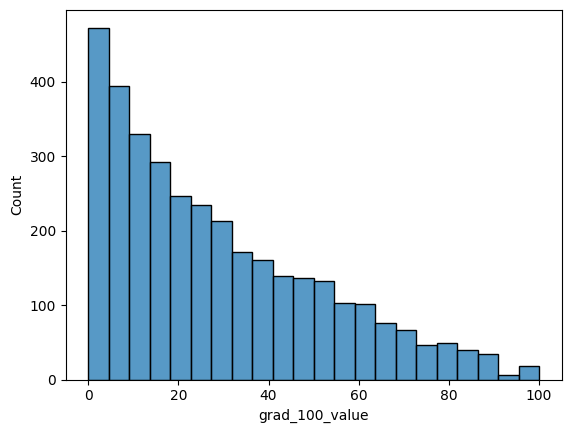

In [30]:
# Part 4

import seaborn as sns
var = 'grad_100_value'
sns.histplot(data=df,x=var)
df[var].describe()

<Axes: xlabel='grad_100_value', ylabel='Density'>

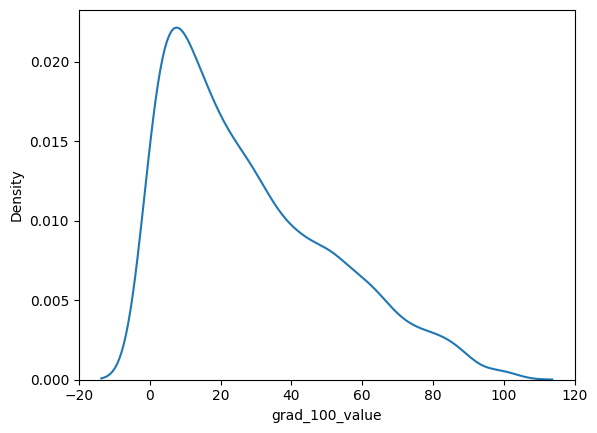

In [31]:
sns.kdeplot(data=df,x=var)

<Axes: xlabel='grad_100_value'>

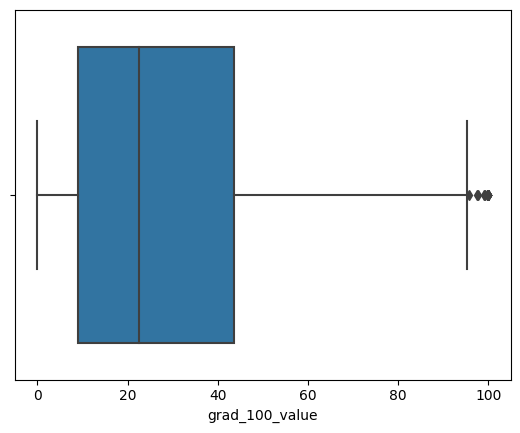

In [32]:
sns.boxplot(data=df,x=var)

In [ ]:
# Part 5

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.